## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the person with the required details is suitable to provide credit loan or not <br><br>
- Since, most of the banks are making huge profit using the interests from credit loan, analsing and giving loan to the proper and suitable people who gaurantees to pay back the loan is highly essential.


### 2) Data Collection
- Dataset Source - South German Credit. (2019). UCI Machine Learning Repository. 
 https://doi.org/10.24432/C5X89F
- The data consists of 21 columns and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score



In [2]:
data = pd.read_csv("data/SouthGermanCredit.asc",delimiter=' ')

In [3]:
data

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


### Column names are in German, Lets convert it into English

In [4]:
columns_english = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'}

In [5]:
data = data.rename(columns=columns_english)

In [6]:
data.to_csv('SouthGerman.csv', index = False)

In [7]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [8]:
data.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


### 2.2 Dataset information

Please visit the `codetable.txt` file to know about the dataset

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [9]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### There are *NO* missing values

In [10]:
data.duplicated().sum()

0

### Also *NO* duplicates

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [12]:
data.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

In [13]:
data.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


# EDA

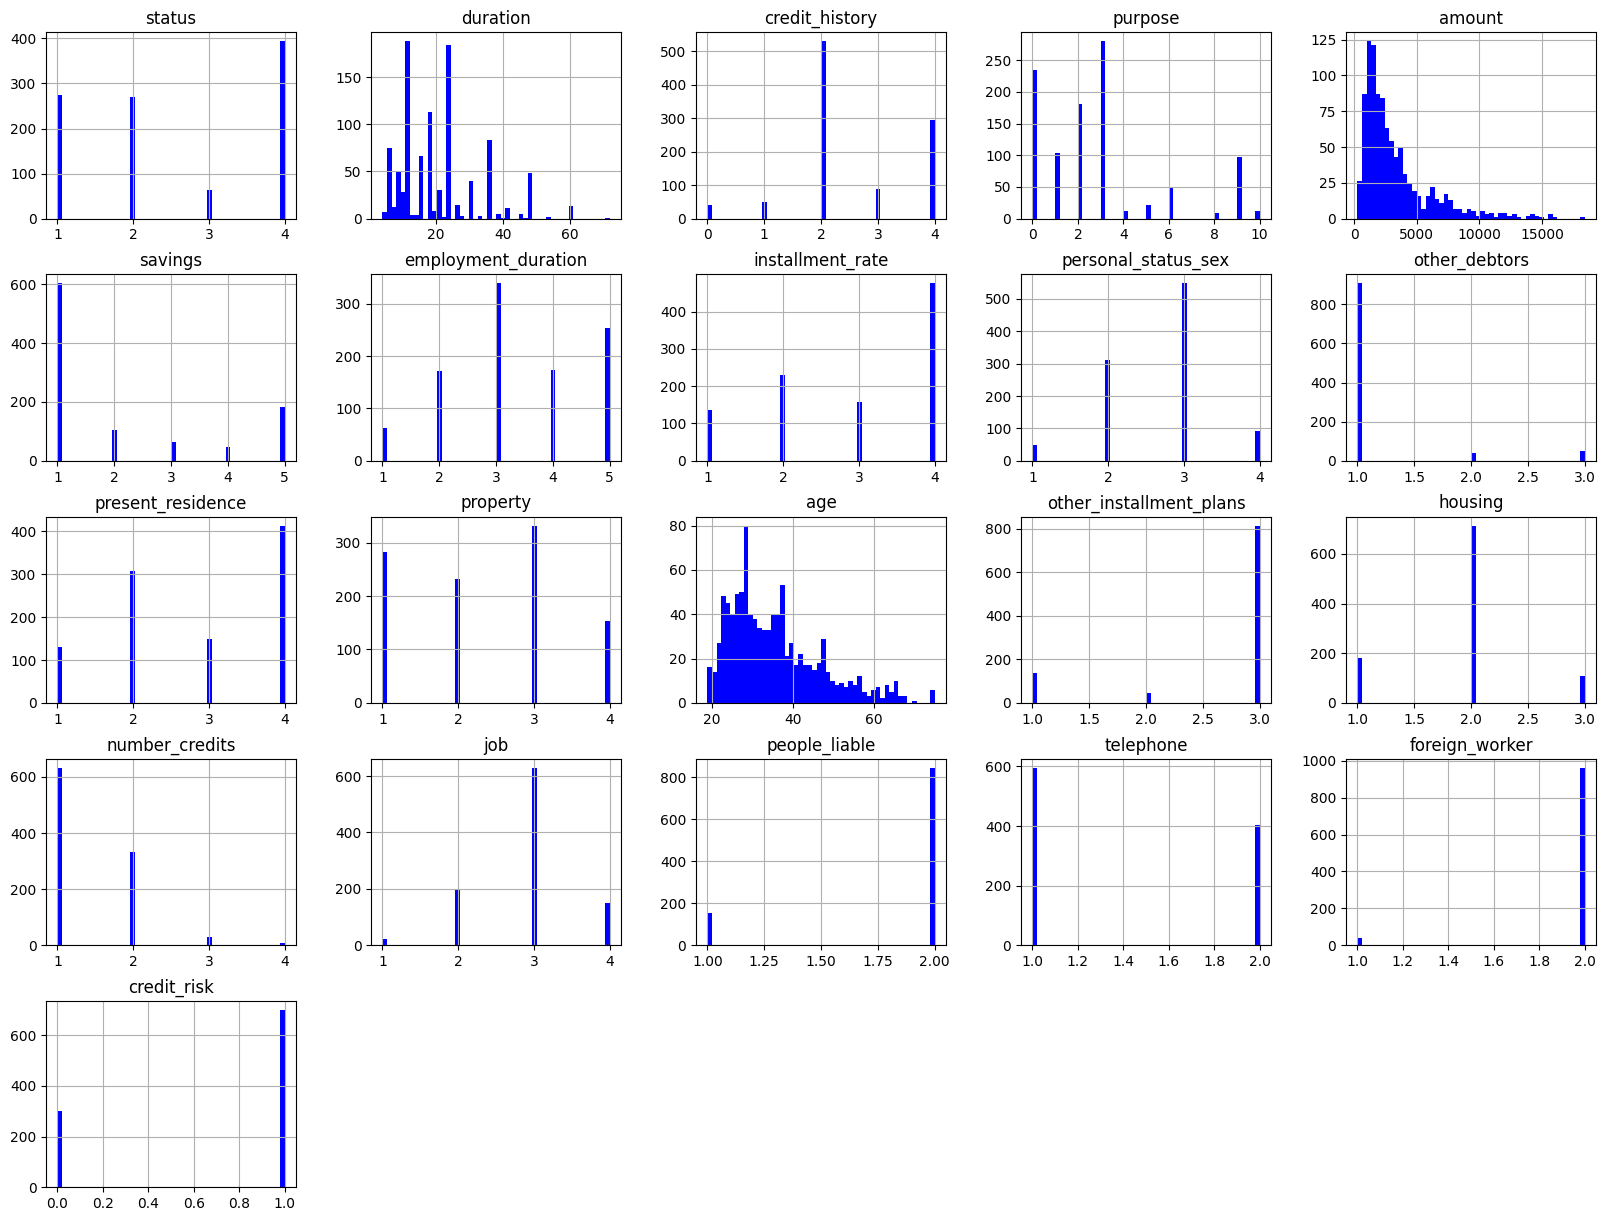

In [14]:

data.hist(bins=50,figsize=(20,15),color='blue')
plt.show()

#### All the columns were already preprocessed well with proper encoding. In that, age and amount were the only continuous columns, whereas the rest were in discrete.

### Comparing the Credit risk for the people with account balance more than 200DM with the rest:

In [15]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


# Question - 1: <br> Compare the status of account, if the bank balance is more than 200DM for atleast 1 year with the people with lesser balance among the loan approval

In [16]:
balance_200 = data[data['status']==4]
balance_lessthan_200 = data.drop(data[data['status']==4].index)

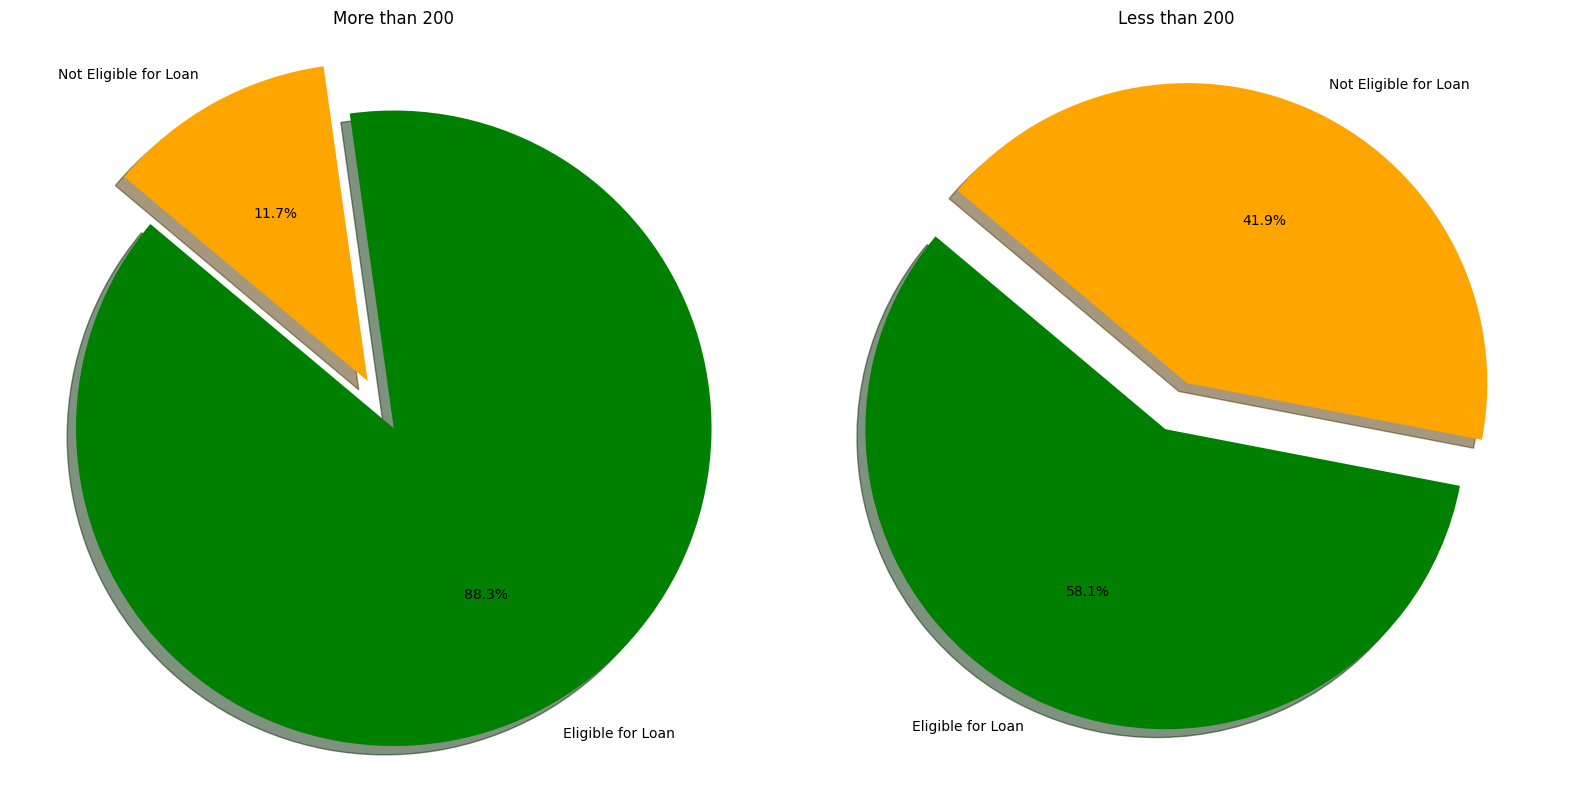

In [17]:
col = [balance_200, balance_lessthan_200]
titles = ['Loan Eligibility of Customers with Bank Balance > $200', 
          'Loan Eligibility of Customers with Bank Balance < $200']

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for idx, (i, title) in enumerate(zip(col, titles)):
    total_customers = len(i)
    eligible_customers = len(i[i['credit_risk'] == 1])
    ineligible_customers = len(i[i['credit_risk'] == 0])

    # Calculate percentages
    eligible_percentage = (eligible_customers / total_customers) * 100
    ineligible_percentage = (ineligible_customers / total_customers) * 100

    # Plotting
    labels = ['Eligible for Loan', 'Not Eligible for Loan']
    sizes = [eligible_percentage, ineligible_percentage]
    colors = ['green', 'orange']
    explode = (0.1, 0.07)  # explode the 1st slice (Eligible)

    axes[idx].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                  shadow=True, startangle=140)
    axes[idx].set_title('More than 200' if idx == 0 else 'Less than 200')
    axes[idx].axis('equal')

plt.tight_layout()
plt.show()

#### People with bank balance `more than 200` have `higher acceptance` of getting loan comparing to others with less than 200.

# Question 2: <br> Compare the savings and loan amount using correlation.

In [18]:
r = np.corrcoef(data['amount'],data['savings'])
print("The correlation between Amount and Savings is: ",r[0,1])

The correlation between Amount and Savings is:  0.0646321679240174


### It is very weak positive correlation. Hence, to determing the loan eligibility, savings is not the best option. Try to consider other parameters.

# Question - 3: <br> Visualize the graph for the purpose, people are trying to get loan (From higher to lower priority)

/var/folders/lm/glp0jz0x7jn2sh195sgrmxx80000gn/T/ipykernel_90608/37016457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')


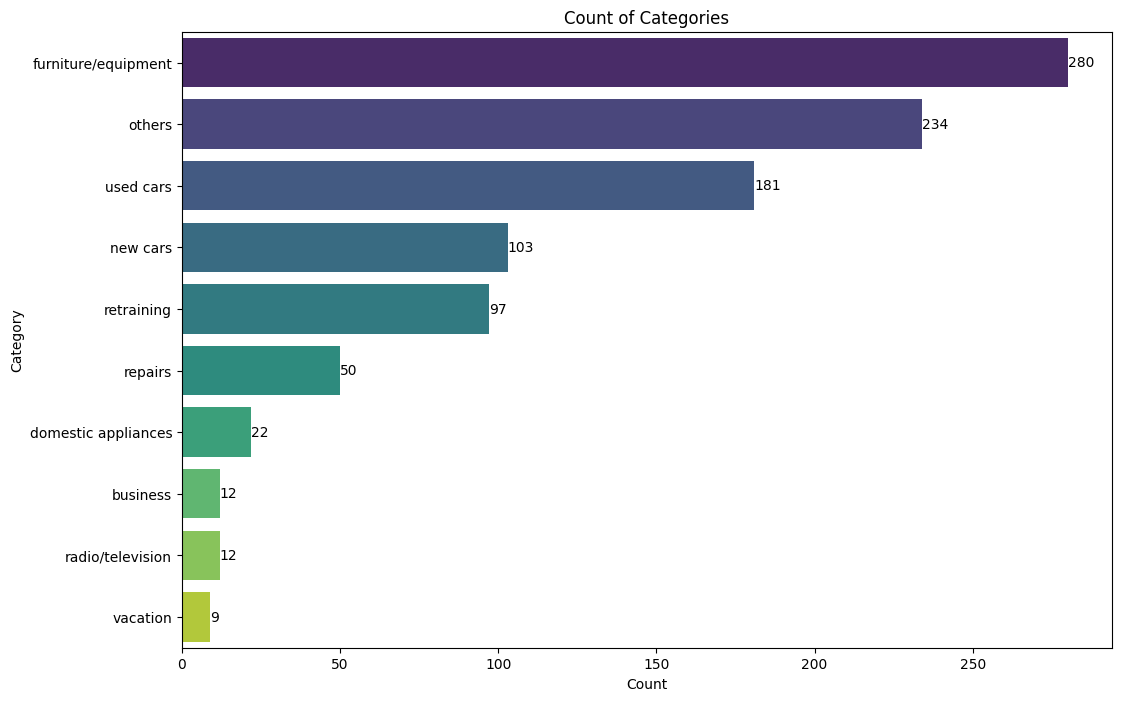

In [19]:
counts = data['purpose'].value_counts().sort_values(ascending=False)

labels = ['others', 'new cars', 'used cars', 'furniture/equipment', 'radio/television', 'domestic appliances', 'repairs', 'education', 'vacation', 'retraining', 'business']
counts.index = [labels[i] for i in counts.index]

plt.figure(figsize=(12, 8))
sns.barplot(x=counts.values, y=counts.index, palette='viridis')


for index, value in enumerate(counts.values):
    plt.text(value, index, f'{value}', color='black', ha='left', va='center')


plt.title('Count of Categories')
plt.xlabel('Count')
plt.ylabel('Category')

plt.show()

### German people are investing more on `Furnitures and Equipments` 

In [20]:
data_scaled = data.copy()

### Lets normalize the duration, age and salary column since they are significantly differ from the other columns, and this may affect the performance of model,

In [21]:
scaler = MinMaxScaler()
columns_to_normalize = ['duration', 'amount', 'age']

In [22]:
data_scaled[columns_to_normalize] = scaler.fit_transform(data_scaled[columns_to_normalize])

In [23]:
data_scaled.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,0.205882,4,2,0.043964,1,2,4,2,1,...,2,0.035714,3,1,1,3,2,1,2,1
1,1,0.073529,4,0,0.140255,1,3,2,3,1,...,1,0.303571,3,1,2,3,1,1,2,1
2,2,0.117647,2,9,0.032519,2,4,2,2,1,...,1,0.071429,3,1,1,2,2,1,2,1
3,1,0.117647,4,0,0.103004,1,3,3,3,1,...,1,0.357143,3,1,2,2,1,1,1,1
4,1,0.117647,4,0,0.105700,1,3,4,3,1,...,2,0.339286,1,2,2,2,2,1,1,1


<Axes: >

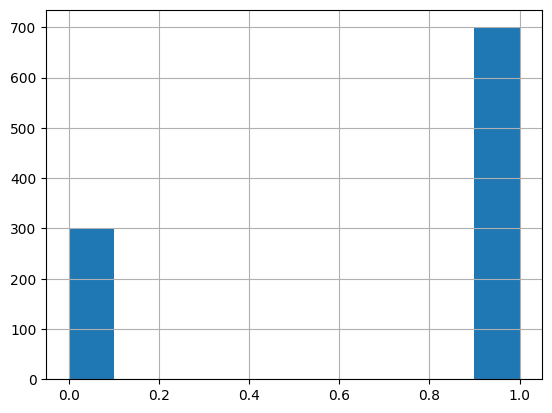

In [24]:
data['credit_risk'].hist()

In [25]:

X_scaled = data_scaled.drop(['credit_risk'],axis=1)
y_scaled = data_scaled['credit_risk']

In [26]:
X = data.drop(['credit_risk'],axis=1)
y = data['credit_risk']

In [27]:
X.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


In [31]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [32]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(800, 20)
(200, 20)
(800,)
(200,)


## Implementing ML Algorithms

### Logistic Regression

In [33]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train_scaled,y_train)

y_pred = logistic_regression.predict(X_test_scaled)

In [34]:
accuracy = logistic_regression.score(X_test_scaled,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        62
           1       0.78      0.89      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.75      0.73       200



### Naive Bayes

### Decision Tree Classifier

In [35]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=None,max_features='log2',min_samples_leaf=4,min_samples_split=5,splitter='random')
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        62
           1       0.80      0.81      0.81       138

    accuracy                           0.73       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.73      0.73      0.73       200



## Random Forest Classifier

In [36]:
random_forest = RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=5,n_estimators=200)

random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.45      0.53        62
           1       0.78      0.89      0.83       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200



In [37]:
svm_classifier = SVC(kernel='linear')  # You can also try 'rbf', 'poly', 'sigmoid' kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [38]:

# Make predictions
y_pred = svm_classifier.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50        62
           1       0.77      0.86      0.81       138

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.65       200
weighted avg       0.71      0.72      0.71       200



In [39]:
print(type(precision_score(y_test, y_pred)))

<class 'numpy.float64'>


### Since, there are significantly unequal number of occurrences in `credit_risk [Target Variable]`, accuracy will not give us the real meaning, we then go for Precision and Recall

### Out of all the algorithms, Nzive Bayes have performed consistently 

In [40]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy_test = naive_bayes.score(X_test,y_test)
accuracy_train = naive_bayes.score(X_train,y_train)
print("Test Accuracy: ",accuracy_test)
print("------------------------")
print("Train Accuracy: ")
print(classification_report(y_test, y_pred))

Test Accuracy:  0.765
------------------------
Train Accuracy: 
              precision    recall  f1-score   support

           0       0.62      0.63      0.62        62
           1       0.83      0.83      0.83       138

    accuracy                           0.77       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.77      0.77      0.77       200



In [46]:
x = np.array([[2,15,1,0,1264,2,3,2,4,1,2,2,25,3,1,1,3,2,1,2]])
naive_bayes.predict(x)

/Users/suriyag/Documents/end2endml/credit_risk_prediction/endtoendml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])